
# Distribuição de Probabilidade e identificação de Outliers
---

 Bem-vindo ao nosso repositório de análise exploratória de dados em Python, onde mergulhamos em informações sobre monóxido de carbono, em um dataset da United States Environmental Protection Agency (EPA).

Link: https://www.epa.gov/outdoor-air-quality-data

**Questão de negócio:** Seu gerente de projetos pediu para determinar quais regiões necessitam de apoio para melhorar a qualidade do ar. Dado que o monóxido de carbono é um dos principais poluentes do ar, investigaremos os dados do Índice de Qualidade do Ar (AQI) em relação ao monóxido de carbono.


#Primeiramente, importaremos as bibliotecas relevantes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [ ]:
# E também faremos upload do arquivo e atribuiremos a uma variável
data = pd.read_csv("epa_air_quality.csv")

#Análise Explorativa
Analisaremos o DataFrame e entender a estrutura e os dados que ele contém

In [ ]:
data['aqi_log'] = np.log10(df['aqi_log']) #transformando em logarítmo para tornar mais simples a análise
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


In [ ]:
# checando número de linhas e colunas
data.shape

(260, 8)

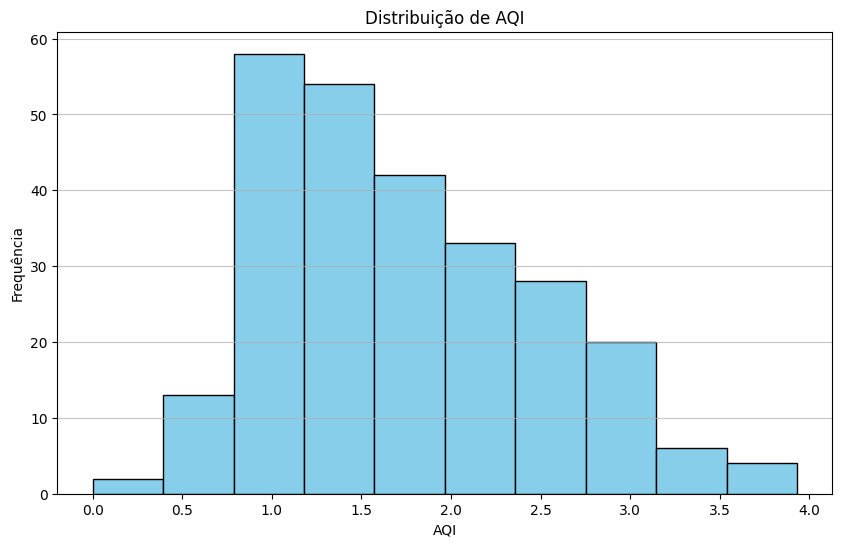

In [ ]:
# verificando a distribuição de "aqi_log"

plt.figure(figsize=(10, 6))
plt.hist(data['aqi_log'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição de AQI')
plt.xlabel('AQI')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

#Testes Estatísticos

Podemos ver que a distribuição se assemelha a uma ``distribuição normal``. Portanto, aplicaremos a ``Regra Empírica`` de uma distribuição, para checar se a coluna tem de fato uma ``distribuição normal``.

**Para uma distribuição ser normal, de acordo com a ``Regra Empírica`` é a seguinte:**

1.  68% dos dados estão dentro de 1 desvio padrão da média.
2.  95% dos dados estão dentro de 2 desvios padrão da média.
3.  99,7% dos dados estão dentro de 3 desvios padrão da média.

**Isso também nos permitirá encontrar nossos ``Outliers``, e então checar qual localidade é prioritária para análise aprofundada de sua qualidade de ar.**

**Este tipo de checagem tem inúmeras aplicações, como:**

*   Riscos ambientais (Este caso)
*   Fraudes (Finânças, vendas)
*   Desempenho satisfatório ou insatisfatório (RH)
*   Pesquisa de mercado
*   Avaliações extremas (Marketing)
*   Melhores clientes








In [ ]:
# cálculo da média

mean_aqi_log = data["aqi_log"].mean()

print(mean_aqi_log)

1.7669210929985582


In [ ]:
# cálculo do desvio padrão

std_aqi_log = data["aqi_log"].std()

print(std_aqi_log)

0.7147155520223721


In [ ]:
# 1. 68% dos dados estão dentro de 1 desvio padrão da média.

limite_inferior = mean_aqi_log - 1 * std_aqi_log

limite_superior = mean_aqi_log + 1 * std_aqi_log

# Porcentagem dos dados
((data["aqi_log"] >= limite_inferior) & (data["aqi_log"] <= limite_superior)).mean() * 100

76.15384615384615

In [ ]:
# 2. 95% dos dados estão dentro de 2 desvios padrão da média.

limite_inferior = mean_aqi_log - 2 * std_aqi_log

limite_superior = mean_aqi_log + 2 * std_aqi_log

((data["aqi_log"] >= limite_inferior) & (data["aqi_log"] <= limite_superior)).mean() * 100

95.76923076923077

In [ ]:
# 3. 99,7% dos dados estão dentro de 3 desvios padrão da média.

limite_inferior = mean_aqi_log - 3 * std_aqi_log

limite_superior = mean_aqi_log + 3 * std_aqi_log

((data["aqi_log"] >= limite_inferior) & (data["aqi_log"] <= limite_superior)).mean() * 100

99.61538461538461

#Avaliação de Resultados

Os dados podem ser considerados ``aproximadamente normais``, devido 76% se distanciar da regra de 68% por pouco.

* Aproximadamente 76,15% dos dados estão dentro de 1 desvio padrão da média.
* Aproximadamente 95,77% dos dados estão dentro de 2 desvios padrão da média.
* Aproximadamente 99,62% dos dados estão dentro de 3 desvios padrão da média.

#Escore Z

O Score Z indica a posição relativa dos valores (por exemplo, o escore Z mede quantos desvios padrão abaixo ou acima da média um ponto de dados está), ele pode ser usado para detectar valores atípicos.

Se os valores estiverem mais de 3 desvios padrão abaixo ou acima da média. Esses valores podem ser considerados outliers.

In [ ]:
#Usaremos a função zscore() da biblioteca StatsModels

data["z_score"] = stats.zscore(data["aqi_log"], ddof=1)

data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Podemos ver que os dados do Score Z foram inseridos na tabela.

Agora iremos usar uma operação booleana para checar dados que estão acima ou abaixo de 3 desvios padrões da média.

In [ ]:
data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


**Foi então identificado que o local ``WEST PHOENIX``, sendo este o nosso ``Outlier``.**

**Usando métodos estatísticos, foi determinado que o local em ``West Phoenix`` tem uma qualidade do ar pior do que os outros locais. Portanto, agora o estado de ``Arizona`` pode alocar mais recursos para examinar mais a fundo este local, a fim de melhorar a qualidade do ar.**